In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bench = BenchmarkSet("iaml_glmnet", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

In [3]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [4]:
def plot_true_lc(ccs, target, dat):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]
    fidelity_params = bench.config.fidelity_params[0]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        config = pd.DataFrame(data=x, index=[0])
        config.drop(fidelity_params, axis=1, inplace=True)
        pdf = dat.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(
            pdf[bench.config.fidelity_params[0]],
            pdf[target],
            color=colors[i],
            marker="o",
            linestyle="None",
            alpha=0.5,
        )

In [5]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]
    for i, cc in enumerate(ccs):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color=colors[i])

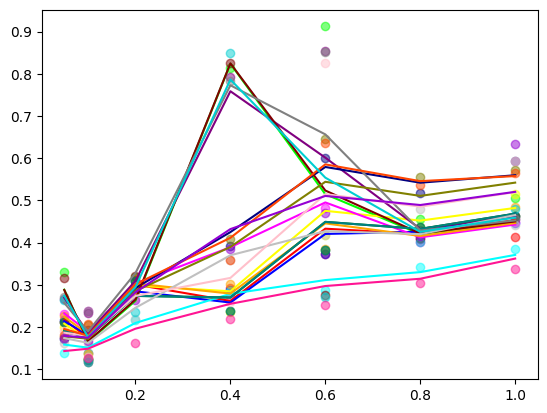

In [23]:
# Draw a sample configuration
tmp = df[df["task_id"] == 1067]
ccs = [tmp.sample(1).to_dict() for i in range(20)]
target = "timetrain"
# target = "model_parameters"
fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
# fidelity_sequence = range(1, 51)
plot_true_lc(ccs, target=target, dat=tmp)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [14]:
ccs

[{'task_id': {2665: 31},
  'pre_post': {2665: 'none'},
  'cp': {2665: 0.00025568204},
  'maxdepth': {2665: 21.0},
  'minbucket': {2665: 13.0},
  'minsplit': {2665: 10.0},
  'reweighing_os_alpha': {2665: nan},
  'EoD_alpha': {2665: nan},
  'trainsize': {2665: 1.0},
  'mmce': {2665: 0.294},
  'f1': {2665: 0.7936145},
  'feo': {2665: 0.17118658},
  'facc': {2665: 0.14486185},
  'ftpr': {2665: 0.1737146},
  'ffomr': {2665: 0.25975874},
  'ffnr': {2665: 0.1737146},
  'rammodel': {2665: 0.324319},
  'timetrain': {2665: 0.904}},
 {'task_id': {3666: 31},
  'pre_post': {3666: 'post'},
  'cp': {3666: 0.09632441},
  'maxdepth': {3666: 8.0},
  'minbucket': {3666: 30.0},
  'minsplit': {3666: 94.0},
  'reweighing_os_alpha': {3666: nan},
  'EoD_alpha': {3666: 1.0},
  'trainsize': {3666: 0.11111111},
  'mmce': {3666: 0.326},
  'f1': {3666: 0.7790768},
  'feo': {3666: 0.01702028},
  'facc': {3666: 0.10669331},
  'ftpr': {3666: 0.018390637},
  'ffomr': {3666: 1.0},
  'ffnr': {3666: 0.018390637},
  'ramm

In [15]:
bench = BenchmarkSet("fair_rpart", active_session=False, check=False, noisy=False)
bench.config.config["model"] = "model_v2.onnx"
print(bench.active_session)
bench.set_session()
print(bench._get_model_path())

target = "mmce"

False
/home/lps/Phd/yahpo_data/fair_rpart/model_v2.onnx


In [16]:
def plot_lc_noisy(cc, target, fidelity_sequence):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]

    for i in range(len(colors)):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out, seed=i)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color=colors[i])

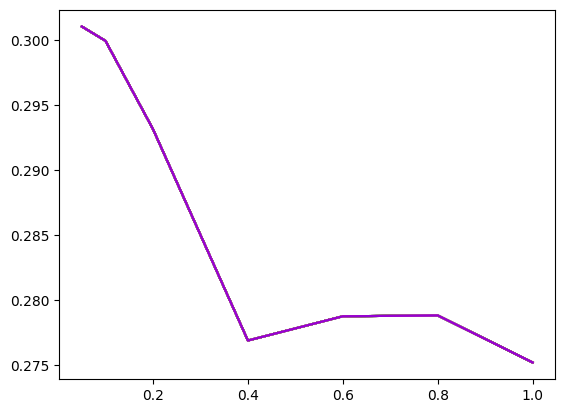

In [17]:
plot_lc_noisy(ccs[8], target, fidelity_sequence)

In [18]:
bench = BenchmarkSet("fair_rpart", active_session=False, check=False, noisy=True)
bench._get_model_path()

'/home/lps/Phd/yahpo_data/fair_rpart/model_v2_noisy.onnx'

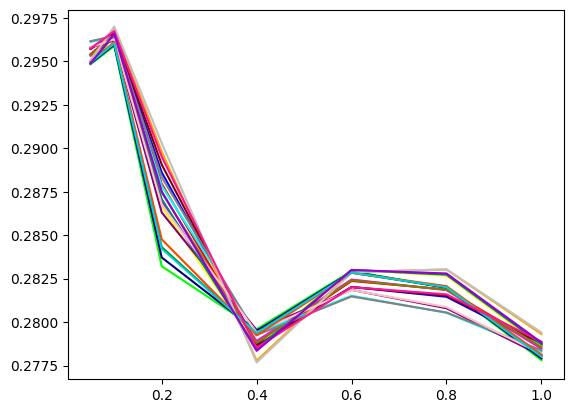

In [19]:
plot_lc_noisy(ccs[8], target, fidelity_sequence)